# Homework 06 - Limitations of computation 

#### Excercise 1

Let $a=b=1$. Write a short program that keeps dividing $b$ in half until the computer decides that $a+b=a$. Print out the value of $b$, and the number of times $b$ was divided. Try again with $a=b=10,000,000$

In [165]:
def floatingPointPrecision(a: float) -> int:
    b = a / 2
    n = 1
    while a + b != a:
        n += 1
        b /= 2
        if n > 1E6:
            break
    print(f"{n = }, {b = }")
    print(f"{a + b = }, {a = }")
    return n

a1 = 1.0
a2 = 10_000_000.0

print(f"It takes {floatingPointPrecision(a1)} divisions for {a1 = }")
print(f"It takes {floatingPointPrecision(a2)} divisions for {a2 = }")

n = 53, b = 1.1102230246251565e-16
a + b = 1.0, a = 1.0
It takes 53 divisions for a1 = 1.0
n = 54, b = 5.551115123125783e-10
a + b = 10000000.0, a = 10000000.0
It takes 54 divisions for a2 = 10000000.0


#### Excercise 2

What is the percent error between the true and computed value of the function
$$\frac{(1+x)-1}{x}$$ 
when $x=1\times10^{-15}$?

What about when $x=1\times10^{-13}$


In [166]:
from typing import Union

def floatingPointError(x: float) -> float:
    return (
        ((1 + x) - 1) / (x)
    )

def percentError(approximate: Union[int, float], exact: Union[int, float]) -> float:
    return (
        abs(approximate - exact) / exact
    )

x1 = 1E-15
x2 = 1E-13

print(f"For {x1 = }, {floatingPointError(x1) = } and the percent error is {percentError(floatingPointError(x1), 1) = }")
print(f"For {x2 = }, {floatingPointError(x2) = } and the percent error is {percentError(floatingPointError(x2), 1) = }")

For x1 = 1e-15, floatingPointError(x1) = 1.1102230246251565 and the percent error is percentError(floatingPointError(x1), 1) = 0.11022302462515654
For x2 = 1e-13, floatingPointError(x2) = 0.9992007221626409 and the percent error is percentError(floatingPointError(x2), 1) = 0.0007992778373591136


#### Excercise 3
Consider the following two equations.
$$ x=1\quad y=1+10^{-14}\sqrt{2}$$

Write a small program that prints all the digits of $10^{+14}(y-x)$, and compare with the actual, correct result.

In [167]:
import numpy as np

x = 1
y = 1 + (1E-14) * np.sqrt(2)

result = (1E14) * (y - x)

print(f"{result = }, {np.sqrt(2) = }")
print(f"{percentError(floatingPointError(result), np.sqrt(2)) = }")

result = 1.4210854715202004, np.sqrt(2) = 1.4142135623730951
percentError(floatingPointError(result), np.sqrt(2)) = 0.29289321881345254


#### Excercise 4

Consider a simple quadratic equation $ax^2+bx+c=0$,  that has real solutions.

Write a program with your own defined function that takes as input the three coefficients $a,b,c$ and prints out the two solutions using the standard formula
$$x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}.$$ 
**A.** Use the program to compute and print the solutions of $x^2-25.0=0$ using scientific notation.

**B.** Use the program to compute and print the solutions of $0.0001x^2+1000x+0.0001=0$  using scientific notation.


There's another way to write the quadratic equation. Write a second defined function that takes as input the three coefficients $a,b,c$ and prints out the two solutions using the other formula
$$x=\frac{2c}{-b\mp\sqrt{b^2-4ac}}.$$ 
**C.** Solve the same equations as before with this method.

**D.** What do you notice about the accuracy of both methods? Why is that?

<div class="alert alert-block alert-info">
<b>Tip:</b> To format output in scientific notation the value in a variable <tt>x</tt>:
<code> print(f"Value: {x:E}")</code>
</div>

In [168]:
from typing import Tuple
def quadratic1(a: float, b: float, c: float) -> Tuple[float, float]:
    return (
        (-b + np.sqrt(b**2 - 4 * a * c)) / (2 * a),
        (-b - np.sqrt(b**2 - 4 * a * c)) / (2 * a)
    )

def quadratic2(a: float, b: float, c: float) -> Tuple[float, float]:
    return (
        (2 * c) / (-b - np.sqrt(b**2 - 4 * a * c)),
        (2 * c) / (-b + np.sqrt(b**2 - 4 * a * c))
    )

# Part A
(a, b, c) = (1, 0, -25.0)
(x1, x2) = quadratic1(a, b, c)
print(f"The roots of the quadratic (Method 1) with {(a, b, c) = } are {(x1, x2) = }")

# Part B
(a, b, c) = (1E-4, 1E3, 1E-4)
(x1, x2) = quadratic1(a, b, c)
print(f"The roots of the quadratic (Method 1) with (a, b, c) = ({a:.4e}, {b:.4e}, {c:.4e}) are (x1, x2) = ({x1:.4e}, {x2:.4e})")

# Part C
(a, b, c) = (1E-4, 1E3, 1E-4)
(x1, x2) = quadratic2(a, b, c)
print(f"The roots of the quadratic (Method 2) with (a, b, c) = ({a:.4e}, {b:.4e}, {c:.4e}) are (x1, x2) = ({x1:.4e}, {x2:.4e})")

The roots of the quadratic (Method 1) with (a, b, c) = (1, 0, -25.0) are (x1, x2) = (5.0, -5.0)
The roots of the quadratic (Method 1) with (a, b, c) = (1.0000e-04, 1.0000e+03, 1.0000e-04) are (x1, x2) = (-1.0004e-07, -1.0000e+07)
The roots of the quadratic (Method 2) with (a, b, c) = (1.0000e-04, 1.0000e+03, 1.0000e-04) are (x1, x2) = (-1.0000e-07, -9.9956e+06)


**Answer** 

Both methods appear to give the same results, which should be expected as we are not near the edge of where floating precision errors occur.

#### Excercise 5

Plot 401 equally spaced points around the $x$ values of $(1-2\times10^{-8})$ to $(1+2\times10^{-8})$ of the function
$$f(x)=x^7-7x^6+21x^5-35x^4+35x^3-21x^2+7x-1.$$
This function is of course, $(x-1)^7$, which since $x$ is so close to 1, should be a nearly constant smooth curve close to zero. What did you get? 

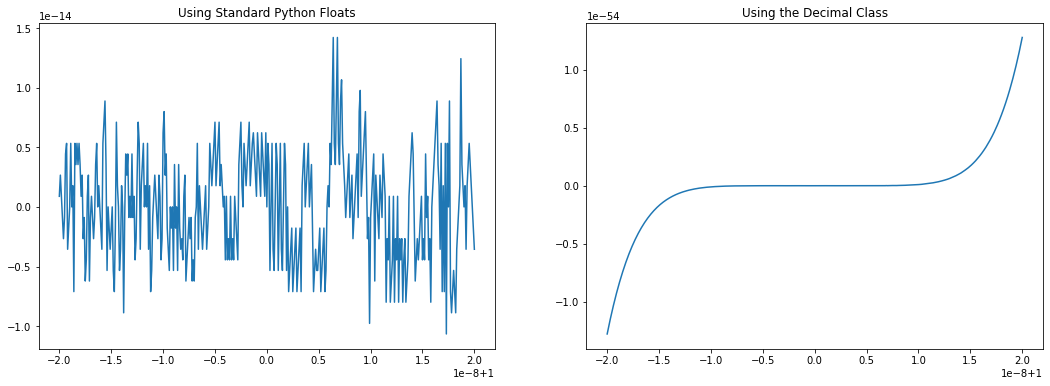

In [169]:
import matplotlib.pyplot as plt
from decimal import Decimal, getcontext

# Set decimal precision to 60 decimals (50 was too small)
getcontext().prec = 60

numPoints = 401
x1 = 1 - 2E-8
x2 = 1 + 2E-8
x = np.linspace(x1, x2, numPoints)

def f_float(x: float) -> float:
    return x**7 - 7*x**6 + 21*x**5 - 35*x**4 + 35*x**3 - 21*x**2 + 7*x - 1

# Solution to the floating point error :)
def f_decimal(x: float) -> Decimal:
    try:
        iterator = iter(x)
    except TypeError:
        y = Decimal(x)
    else:
        y = np.array(list(map(Decimal, x)))
    return y**7 - 7*y**6 + 21*y**5 - 35*y**4 + 35*y**3 - 21*y**2 + 7*y - 1

fig, ax = plt.subplots(1, 2, figsize=[18,6])
ax[0].set_title("Using Standard Python Floats")
ax[0].plot(x, f_float(x))
ax[1].set_title("Using the Decimal Class")
ax[1].plot(x, f_decimal(x))

plt.show()


**Answer**

Clearly, this is not a straight line at all, and shows the issue with floating point numbers and their precision. 

On the right however, I have used the Decimal library which allows you to set an arbitrary precision for decimal numbers, which solves the issue and does indeed now plot the function correctly :)

See the documentation <a href=https://docs.python.org/3/library/decimal.html#module-decimal>here</a>.

#### Excercise 6

Let's explore how careful algorithmic complexity can increase the speed of a problem.

**A.** Write a program using the standard three-loop algorithm that multiplies two $N\times N$ matricies, where $N\geq10$. Time how long it takes in seconds. Use the following code to generate random number matricies, and time the multiplication. Print out the first 5 elements of the first row of your matrix.

By declaring the matrix `C` early, we can ensure that all the memory needed to hold the arrays is set at the beginning, and that no time is spent creating space or growing arrays to hold the values.
```python
import time
import numpy
N=25
A=numpy.random.rand(N,N)
B=numpy.random.rand(N,N)
C=numpy.zeros([N,N],float)

start_time = time.time()
# DO THE MULTIPLICATION LOOPS HERE
end_time = time.time()
print(f"Time elapsed: {end_time-start_time} seconds")
```

**B.** Now use the `numpy.dot` function to multiply the same matricies $A$ and $B$. Make sure you get the same result as above, by comparing at least the first 5 elements of the first row of the result. 

**C.** Try larger and larger values of $N$ (up to about 250) and time how long it takes for the three-loops long way, and for the `numpy.dot` method.

* Which method is faster when $N$ is small, for example, $N=10$?
* What value of $N$ did your method start to take more than 1 second?
* How much faster is the `numpy.dot` method to yours for $N=250$?

In [172]:
import time as t

def matrixMultiplicationTiming(N: int, M: int, L: int) -> None:
    A = np.random.rand(N, M)
    B = np.random.rand(M, L)

    print(f"Matrix A ({N}x{M}) multiplied by Matrix B ({M}x{L})\n")

    print("Python For loop matrix multiplication in progress...")
    C = np.zeros([N, L], float)
    start_time = t.time()

    for i in range(N):
        for j in range(L):
            for k in range(M):
                C[i, j] += A[i, k] * B[k, j]

    end_time = t.time()

    print(f"Time elapsed: {end_time-start_time} seconds")
    print(f"The first 5 elements of C are {C[0,0:5] = }\n")

    print("Numpy matrix multiplication in progress...")
    C = np.zeros([N, L], float)
    start_time = t.time()

    C = np.dot(A, B)

    end_time = t.time()

    print(f"Time elapsed: {end_time-start_time} seconds")
    print(f"The first 5 elements of C are {C[0,0:5] = }\n\n\n")

N = np.arange(25, 250, 25)
for i in range(N.shape[0]):
    matrixMultiplicationTiming(N[i], N[i], N[i])

Matrix A (25x25) multiplied by Matrix B (25x25)

Python For loop matrix multiplication in progress...
Time elapsed: 0.011003494262695312 seconds
The first 5 elements of C are C[0,0:5] = array([7.30945532, 6.45904109, 6.89535612, 7.07235867, 6.81766269])

Numpy matrix multiplication in progress...
Time elapsed: 0.0 seconds
The first 5 elements of C are C[0,0:5] = array([7.30945532, 6.45904109, 6.89535612, 7.07235867, 6.81766269])



Matrix A (50x50) multiplied by Matrix B (50x50)

Python For loop matrix multiplication in progress...
Time elapsed: 0.09101986885070801 seconds
The first 5 elements of C are C[0,0:5] = array([14.86971633, 13.11730559, 12.6284447 , 12.39676923, 12.08407037])

Numpy matrix multiplication in progress...
Time elapsed: 0.0 seconds
The first 5 elements of C are C[0,0:5] = array([14.86971633, 13.11730559, 12.6284447 , 12.39676923, 12.08407037])



Matrix A (75x75) multiplied by Matrix B (75x75)

Python For loop matrix multiplication in progress...
Time elapsed: 0.2

In [173]:
matrixMultiplicationTiming(10, 10, 10)

Matrix A (10x10) multiplied by Matrix B (10x10)

Python For loop matrix multiplication in progress...
Time elapsed: 0.0 seconds
The first 5 elements of C are C[0,0:5] = array([3.28967765, 4.33437273, 3.80026136, 5.00405433, 3.70360062])

Numpy matrix multiplication in progress...
Time elapsed: 0.0 seconds
The first 5 elements of C are C[0,0:5] = array([3.28967765, 4.33437273, 3.80026136, 5.00405433, 3.70360062])





**Answer**


For N = 10, both methods are nearly instant, so the method does not play much of a role. 
(Perhaps on a slower machine it might)

The For loop method began taking >1 second to compute between N = 100 and N = 125.

The numpy method for N = 250 is almost instant, as compared to the For loop which took 7 seconds to compute.